N = 250 | Time since last checkpoint: 1.76 | Time since start: 1.76
N = 500 | Time since last checkpoint: 0.94 | Time since start: 2.7
N = 750 | Time since last checkpoint: 1.33 | Time since start: 4.03
N = 1000 | Time since last checkpoint: 4.08 | Time since start: 8.11
N = 1250 | Time since last checkpoint: 5.49 | Time since start: 13.6
N = 1500 | Time since last checkpoint: 5.45 | Time since start: 19.06
N = 1750 | Time since last checkpoint: 7.18 | Time since start: 26.24
N = 2000 | Time since last checkpoint: 6.86 | Time since start: 33.1
N = 2250 | Time since last checkpoint: 7.63 | Time since start: 40.73
N = 2500 | Time since last checkpoint: 8.09 | Time since start: 48.82
N = 2750 | Time since last checkpoint: 10.06 | Time since start: 58.89
N = 3000 | Time since last checkpoint: 8.02 | Time since start: 66.91
N = 3250 | Time since last checkpoint: 9.68 | Time since start: 76.59
N = 3500 | Time since last checkpoint: 10.66 | Time since start: 87.25
N = 3750 | Time since last c

<Figure size 700x500 with 0 Axes>

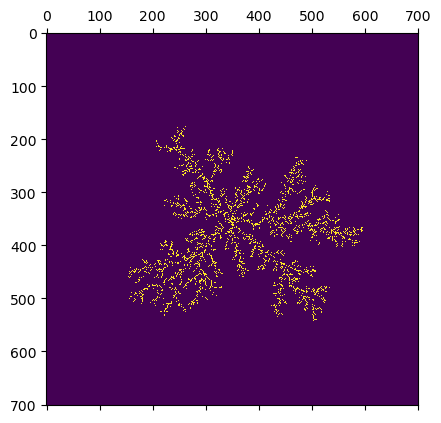

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as ant
import time
#import numba

t0 = time.time()
tmid1 = t0
particles = 1
total = 10000
size = 701 #size of the grid, must be odd for a center
x0 = int((size - 1) / 2)
e_radius = 15 #edge radius
d_radius = 35 # death radius
tree = np.zeros([size, size]) # n X n array means array center is [(n-1)/2,(n-1)/2] when n is odd
tree[x0, x0] = 1
spawn_overlap = 0
sticky = 0.5 #Chance that the particle sitcks to the aggregate

x1 = []
y1 = []
fig = plt.figure(figsize = (7,5))

def Spawn():
    rand1 = random.randrange(36000) / 100
    angle = rand1 * np.pi / 180
    if 90 > rand1 >= 0:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 180 > rand1 >= 90:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    if 270 > rand1 >= 180:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 360 > rand1 >= 270:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    return round(x), round(y)


i=0

spawn = 0

while particles < total:
    x, y = Spawn()
    spawn += 1
    if tree[x, y] == 0:
        while (tree[x + 1, y] + tree[x - 1, y] + tree[x, y + 1] + tree[x, y - 1] + tree[x + 1, y + 1]  
            + tree[x + 1, y - 1] + tree[x - 1, y + 1] + tree[x - 1, y - 1] == 0): #NOT NEAR AGGREGATE
    
            randx = random.randrange(-1,2)
            randy = random.randrange(-1,2)
            x += randx
            y += randy
                
            if np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > d_radius: # Checking if particle is in death zone
                break
                    
            elif (tree[x + 1, y] + tree[x - 1, y] + tree[x, y + 1] + tree[x, y - 1] + tree[x + 1, y + 1]  #Long statement checking if particle is near aggregate
                   + tree[x + 1, y - 1] + tree[x - 1, y + 1] + tree[x - 1, y - 1] > 0):
                rand2 = random.randrange(1,1001) / 1000
                if rand2 < sticky: #Allows to stick
                    tree[x, y] = 1
                    particles += 1
                    if (particles / 250) == int(particles / 250):
                        tmid2 = time.time()
                        print("N =", particles, "| Time since last checkpoint:", round(tmid2 - tmid1, 2), "| Time since start:", round(tmid2 - t0, 2))
                        tmid1 = tmid2
                        
                else: #Move that accounts for the possiblility of moving inside the aggregate
                    while i < 1:
                        randx = random.randrange(-1,2)
                        randy = random.randrange(-1,2)
                        if tree[x + randx, y + randy] == 0:
                            x += randx
                            y += randy
                            break
                        
                if d_radius > np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > e_radius and d_radius < x0: #Radius updater for every movement
                    e_radius += 1
                    d_radius += 1
                    
                break

t1 = time.time()
hours = int((t1 - t0) / 3600)
minutes = int(((t1 - t0) / 3600 - hours) * 60)
seconds = int(((((t1 - t0) / 3600 - hours) * 60) - minutes) * 60)
print("*** TIME ELAPSED :", hours, "HOURS,", minutes, "MINUTES, AND", seconds, "SECONDS ***")
print("*** TOTAL PARTICLES =", particles, " ***")
plt.matshow(tree)

In [11]:
#print(particles)
print(spawn)
#plt.matshow(tree)
print(np.log(particles) / np.log(e_radius))

54839
1.6717537064401913


NameError: name 'j' is not defined

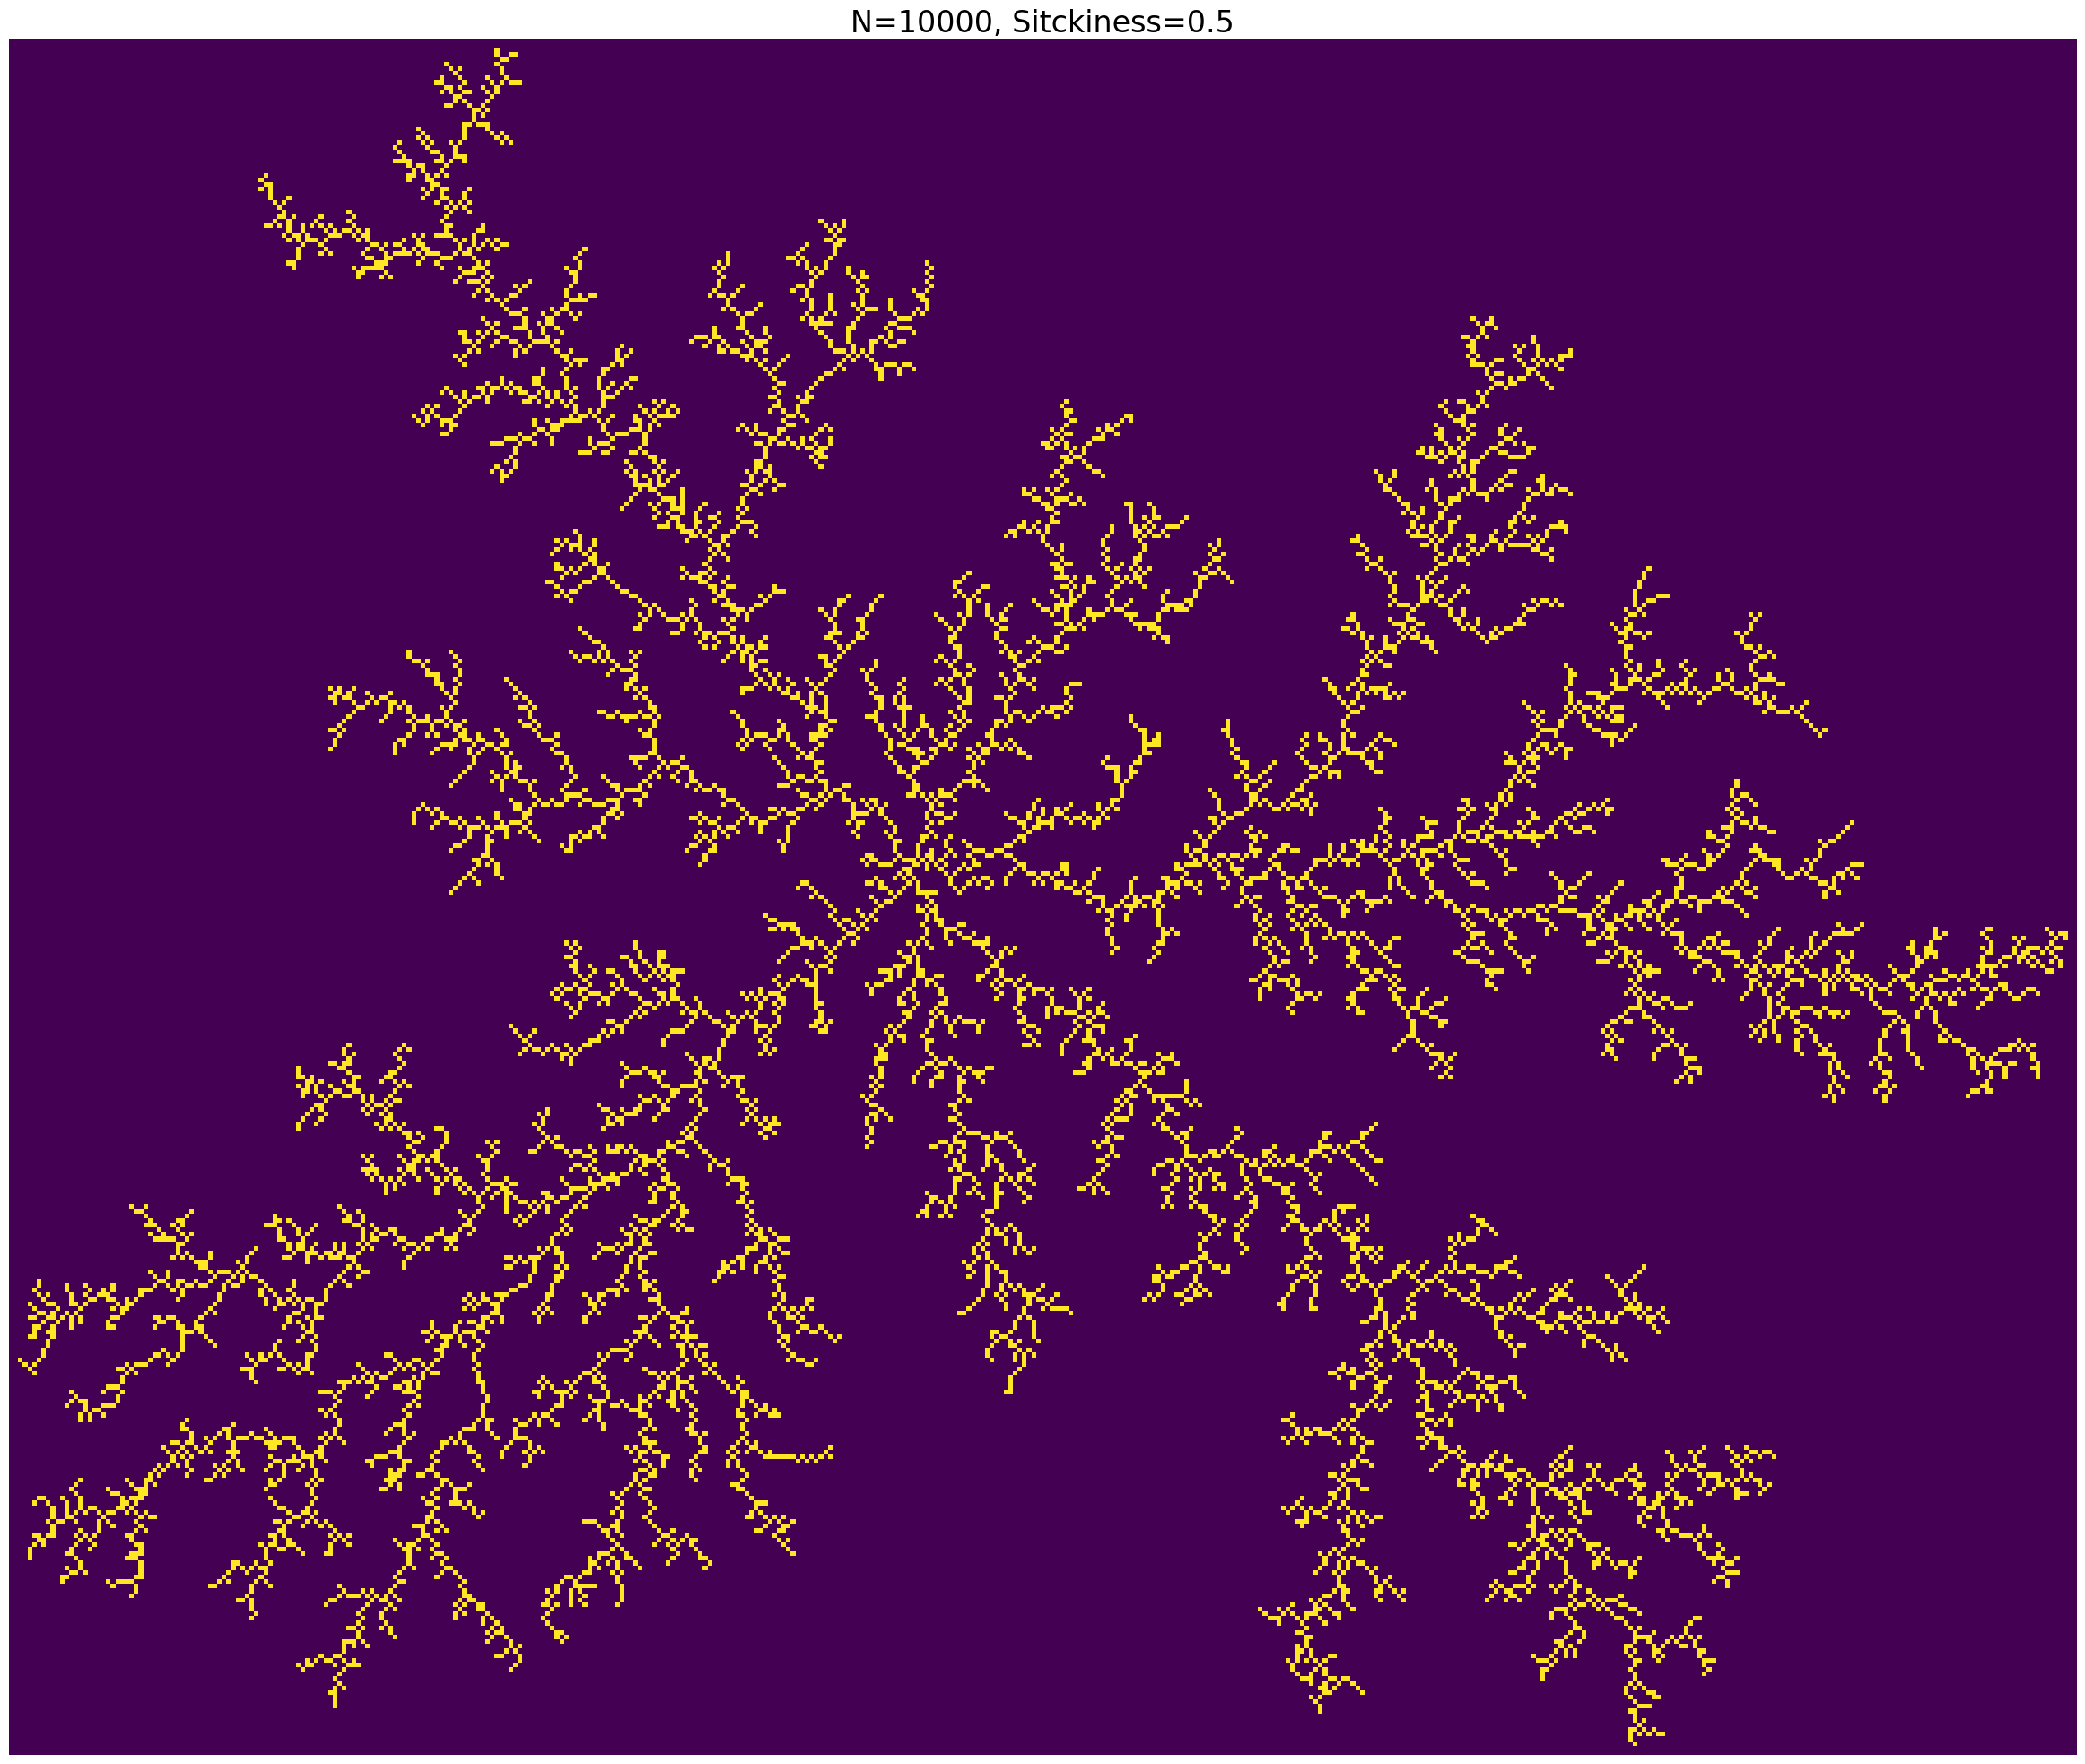

In [13]:
# Make a simple DLA
particles = 10000

# sum columns and rows, identify which elements are not zero
xslice = np.where(np.sum(tree,axis=0))[0]
yslice = np.where(np.sum(tree,axis=1))[0]

# calculate the size of the cropped aggregate
whitespace = 2  # don't crop exactly to the edges of the DLA
ypixels = yslice[-1]-yslice[0]+2*whitespace
xpixels = xslice[-1]-xslice[0]+2*whitespace

# approximate the size of the generated figure. This is more than good enough almost always.
figure_ppi = 15  # ppi = pixels per inch
figw = xpixels/figure_ppi
figh = ypixels/figure_ppi+0.375  # add extra space for the figure title

# Create a figure/axis object (this makes systematic figure generation much easier)
# NB you should specify the length and width of the figure (in inches) here.
fig, ax = plt.subplots(figsize=(figw, figh))

# slice the "crystal" object on the edges identified with the "where" command.
# NB: you can break a python function call over multiple lines to make it easier to read
_ = ax.imshow(tree[yslice[0]-whitespace:yslice[-1]+whitespace+1,
                      xslice[0]-whitespace:xslice[-1]+whitespace+1],
               origin='upper',
               interpolation='nearest',
               aspect='equal')

# these optional parameters (origin, interpolation, aspect) are automatically set by matshow,
# but matshow also moves the axes to the top of the 
_ = ax.axis('off')
_ = ax.set_title(f'N={particles}, Sitckiness={sticky}', fontsize=24)  # note the use of an f-string in this command
fig.savefig(f'Figure_2.png',bbox_inches='tight',dpi=150)

# If you *only* want to save the array, and you want to add the title and all figure details separately
# you can call imsave instead:
plt.imsave(f'Figure_2_base.png',
           tree[yslice[0]-whitespace:yslice[-1]+whitespace+1,
                   xslice[0]-whitespace:xslice[-1]+whitespace+1],
           )
# This shifts the overhead, and now you'll have to figure out how to scale the resulting png so the figure
# is exactly as large as you want. It's not easier per se, but it's predictable and good to know for LaTeX
# manuscripts especially.